# Cargando los datos

El primer paso consistirá en cargar las librerías necesarias (pandas, seaborn, matplotlib y scikit-learn).

In [88]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

Seguidamente, se procederá a cargar los datos a través del método de pandas "read_csv", renombrando la cabecera para hacerla más intuitiva.

In [2]:
labels = [
    'edad',
    'sexo',
    'dolor_pecho',
    'presion_arterial_reposo',
    'colesterol',
    'azúcar_ayunas',
    'electro_reposo',
    'frecuencia_máxima',
    'angina_por_ejercicio',
    'depresión_ST_por_ejercicio',
    'pendiente_ST_max_ejercicio',
    'número_vasos',
    'talio',
    'resultado'
]

In [3]:
df = pd.read_csv('heart.csv', header=0, names = labels)

In [4]:
df.head(15)

,edad,sexo,dolor_pecho,presion_arterial_reposo,colesterol,azúcar_ayunas,electro_reposo,frecuencia_máxima,angina_por_ejercicio,depresión_ST_por_ejercicio,pendiente_ST_max_ejercicio,número_vasos,talio,resultado
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Análisis exploratorio preliminar

A continuación, realizaremos un primer análisis exploratorio de los datos para comprobar con qué contamos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   edad                        303 non-null    int64  
 1   sexo                        303 non-null    int64  
 2   dolor_pecho                 303 non-null    int64  
 3   presion_arterial_reposo     303 non-null    int64  
 4   colesterol                  303 non-null    int64  
 5   azúcar_ayunas               303 non-null    int64  
 6   electro_reposo              303 non-null    int64  
 7   frecuencia_máxima           303 non-null    int64  
 8   angina_por_ejercicio        303 non-null    int64  
 9   depresión_ST_por_ejercicio  303 non-null    float64
 10  pendiente_ST_max_ejercicio  303 non-null    int64  
 11  número_vasos                303 non-null    int64  
 12  talio                       303 non-null    int64  
 13  resultado                   303 non

Se comprueba que contamos con 303 entradas y que para ninguna de las categorías hay elementos nulos (NaN)

# Representaciones gráficas

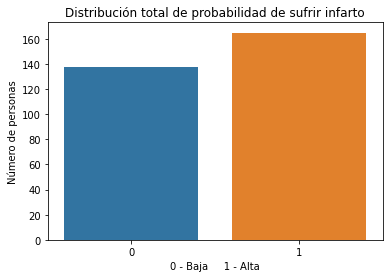

In [6]:
sns.countplot(x = 'resultado', data = df)
plt.xlabel("0 - Baja     1 - Alta")
plt.ylabel("Número de personas")
plt.title("Distribución total de probabilidad de sufrir infarto")
plt.show()

In [7]:
print('Alta probabilidad: ',(df['resultado']==1).sum())
print('Baja probabilidad: ',(df['resultado']==0).sum())

Alta probabilidad:  165
Baja probabilidad:  138


Con esta primera visualización se comprueba que, para la muestra de datos, 165 personas tienen altas probabilidades de sufrir un infarto frente a 138 que no.

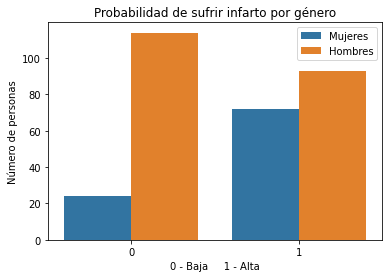

In [8]:
sns.countplot(x = 'resultado', hue = 'sexo', data = df)
plt.xlabel("0 - Baja     1 - Alta")
plt.ylabel("Número de personas")
plt.title("Probabilidad de sufrir infarto por género")
plt.legend(['Mujeres','Hombres'])
plt.show()

Este gráfico parece indicarnos que, en relación a su género, las mujeres cuentan con más probabilidades de padecer un infarto que los hombres. Habría que comprobar si los datos están balanceados.

In [9]:
print('Número total de mujeres: ', (df['sexo']==0).sum())
print('Número total de hombres: ', (df['sexo']==1).sum())

Número total de mujeres:  96
Número total de hombres:  207


Esta distribución se puede comprobar en la siguiente imagen:

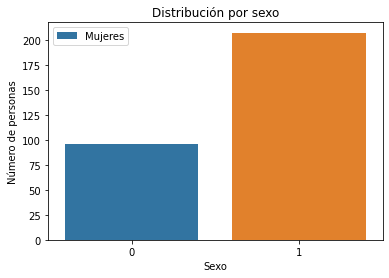

In [10]:
sns.countplot(x = 'sexo', data = df)
plt.xlabel("Sexo")
plt.ylabel("Número de personas")
plt.title("Distribución por sexo")
plt.legend(['Mujeres','Hombres'])
plt.show()

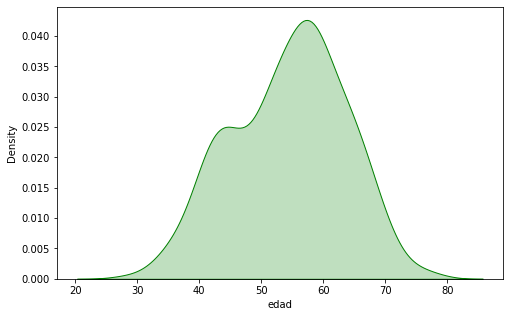

In [11]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['edad'],shade=True, color='g')
plt.show()

Esta gráfica nos muestra el rango de edades de la muestra. Se comprueba que la mayor parte de las personas cuentan con una edad comprendida entre los 45 y los 65 años.

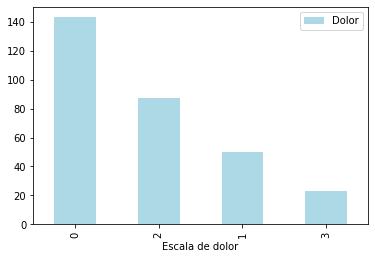

In [12]:
df['dolor_pecho'].value_counts().plot(kind='bar',label='Dolor', color='lightblue')
plt.legend()
plt.xlabel('Escala de dolor')
plt.show()

In [13]:
print('Sin dolor (asintomático):                      ', (df['dolor_pecho']==0).sum())
print('Dolor de angina de pecho atípica:               ', (df['dolor_pecho']==2).sum())
print('Dolor de angina de pecho común:                 ', (df['dolor_pecho']==1).sum())
print('Dolor fuerte no compatible con angina de pecho: ', (df['dolor_pecho']==3).sum())

Sin dolor (asintomático):                       143
Dolor de angina de pecho atípica:                87
Dolor de angina de pecho común:                  50
Dolor fuerte no compatible con angina de pecho:  23


Esto nos indica que la mayoría de pacientes no sufre de dolor alguno en el pecho, seguido de 87 casos en los que el dolor se corresponde con una angina de pecho típica, 50 con un dolor medio compatible con anginas de pecho atípicas y 23 pacientes con un dolor fuerte no compatible con ninguna modalidad de angina de pecho

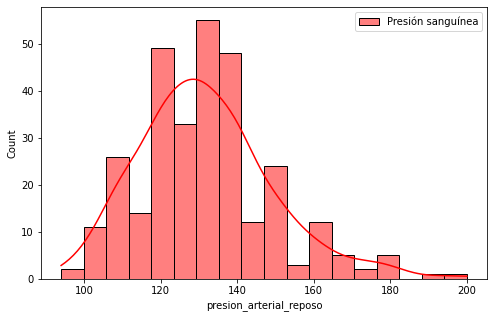

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['presion_arterial_reposo'], color="red", kde= True, label='Presión sanguínea')
plt.legend()
plt.show()

Esta imagen nos indica que los valores más habituales para la presión arterial en reposo están comprendidos entre 110 y 140 mm de Mercurio.

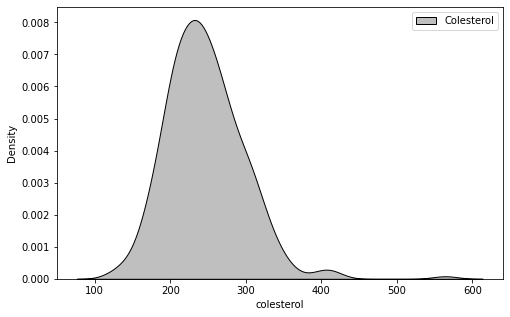

In [15]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['colesterol'],color='black',shade=True,label='Colesterol')
plt.legend()
plt.show()

Los valores más comunes de colesterol en sangre se distribuyen entre los 180 y 300 mg/dl.

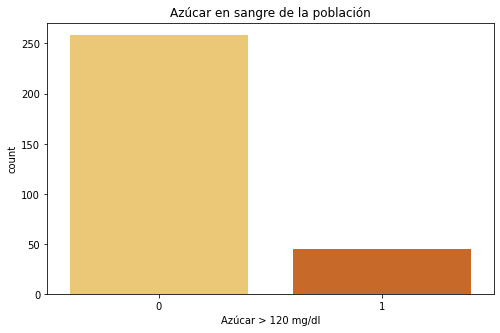

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='azúcar_ayunas', data = df, palette='YlOrBr')
plt.title('Azúcar en sangre de la población')
plt.xlabel('Azúcar > 120 mg/dl')
plt.show()

Aquí se nos indica que la gran mayoría de personas tienen unos niveles de azúcar en sangre inferior a los 120 mg/dl. Cosa sorprendente viendo la cantidad de azúcares añadidos que contienen todas las comidas generalmente.

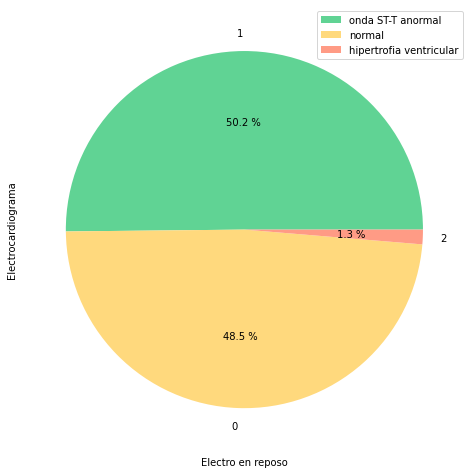

In [17]:
plt.figure(figsize=(8, 11))
colores = ["#60D394","#FFD97D","#FF9B85"]
df['electro_reposo'].value_counts().plot(kind='pie',label='Electrocardiograma', colors=colores, autopct="%0.1f %%")
plt.legend(['onda ST-T anormal','normal','hipertrofia ventricular'], loc="best")
plt.xlabel('Electro en reposo')
plt.show()

Este gráfico circular nos indica el porcentaje en los resultados de los electrocardiogramas efectuados. El 48.5% presentan un electro normal frente al 50.2% que tienen la onda ST-T anormal. Contaríamos con un 1.3% de pacientes que cuentan con hipertrofia ventricular izquierda.

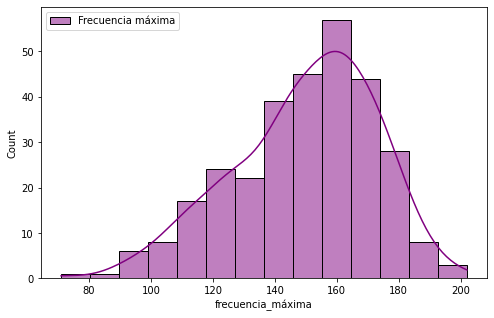

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df['frecuencia_máxima'], color="purple", kde= True, label='Frecuencia máxima')
plt.legend(loc='upper left')
plt.show()

En esta ocasión, podemos observar que la frecuencia máxima más común se encuentra en el intervalo entre las 130 y 180 pulsaciones por minuto. El máximo lo encontramos en 202 pulsaciones, donde muy pocos pacientes (sólo uno) llegan a alcanzar ese límite.

In [19]:
print('Frecuencia cardíaca máxima:                     ', df['frecuencia_máxima'].max())
print('Nº de personas que alcanzan la frecuencia máxima: ',(df['frecuencia_máxima']==202).sum())

Frecuencia cardíaca máxima:                      202
Nº de personas que alcanzan la frecuencia máxima:  1


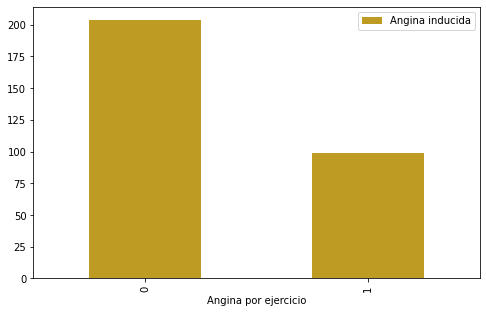

In [20]:
plt.figure(figsize=(8, 5))
df['angina_por_ejercicio'].value_counts().plot(kind='bar',label='Angina inducida', color = '#be9b22')
plt.legend()
plt.xlabel('Angina por ejercicio')
plt.show()

In [21]:
print('Anginas no provocadas por el ejercicio: ', (df['angina_por_ejercicio']==0).sum())
print('Anginas provocadas por el ejercicio:     ', (df['angina_por_ejercicio']==1).sum())


Anginas no provocadas por el ejercicio:  204
Anginas provocadas por el ejercicio:      99


La mayoría de anginas no son provocadas por la realización del ejercicio.

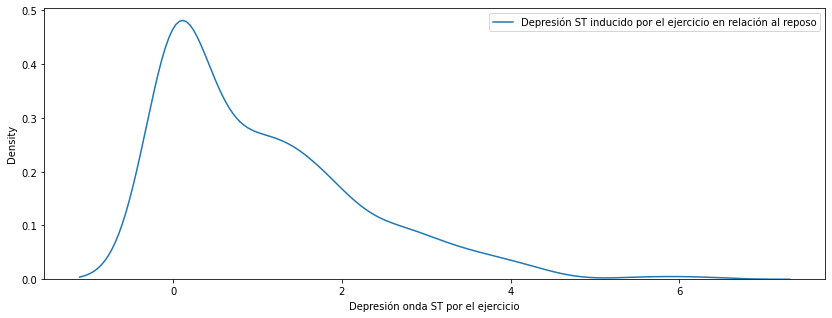

In [22]:
plt.figure(figsize=(14, 5))
sns.kdeplot(df['depresión_ST_por_ejercicio'],shade=False,label='Depresión ST inducido por el ejercicio en relación al reposo')
plt.legend()
plt.xlabel('Depresión onda ST por el ejercicio')
plt.show()

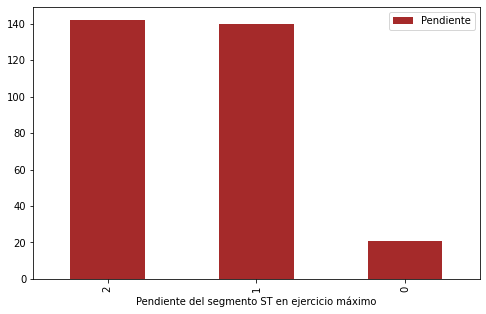

In [23]:
plt.figure(figsize=(8, 5))
df['pendiente_ST_max_ejercicio'].value_counts().plot(kind='bar',label='Pendiente', color="brown")
plt.legend()
plt.xlabel('Pendiente del segmento ST en ejercicio máximo')
plt.show()

In [24]:
print('Nº de personas con pendiente ascendente: ',(df['pendiente_ST_max_ejercicio']==2).sum())
print('Nº de personas con pendiente descendente: ',(df['pendiente_ST_max_ejercicio']==0).sum())
print('Nº de personas con pendiente plana:      ',(df['pendiente_ST_max_ejercicio']==2).sum())

Nº de personas con pendiente ascendente:  142
Nº de personas con pendiente descendente:  21
Nº de personas con pendiente plana:       142


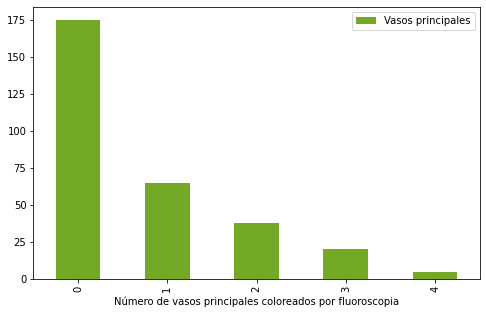

In [25]:
plt.figure(figsize=(8, 5))
df['número_vasos'].value_counts().plot(kind='bar',label='Vasos principales',color='#73a925')
plt.legend()
plt.xlabel('Número de vasos principales coloreados por fluoroscopia')
plt.show()

Esto nos indica que la mayoría de casos no presentan coloración en las arterias principales debido a la fluoroscopia.

# Análisis exploratorio (EDA)

A continuación, realizaremos un primer análisis exploratorio de los datos para comprobar con qué contamos.

In [26]:
df.shape

(303, 14)

Gracias a este método, comprobamos que el dataset, transformado en dataframe, está compuesto por 303 filas y 14 columnas o categorías.

In [27]:
df.ndim

2

Las dimensiones de que está formado son 2.

In [28]:
df.size

4242

El tamaño o número total de datos es de 4.242 (nº de filas x nº de columnas).

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   edad                        303 non-null    int64  
 1   sexo                        303 non-null    int64  
 2   dolor_pecho                 303 non-null    int64  
 3   presion_arterial_reposo     303 non-null    int64  
 4   colesterol                  303 non-null    int64  
 5   azúcar_ayunas               303 non-null    int64  
 6   electro_reposo              303 non-null    int64  
 7   frecuencia_máxima           303 non-null    int64  
 8   angina_por_ejercicio        303 non-null    int64  
 9   depresión_ST_por_ejercicio  303 non-null    float64
 10  pendiente_ST_max_ejercicio  303 non-null    int64  
 11  número_vasos                303 non-null    int64  
 12  talio                       303 non-null    int64  
 13  resultado                   303 non

De esta forma comprobamos todas las categorías que conforman el dataframe (14 en total), presentándose 303 entradas donde no hay datos nulos. El tamaño en memoria es de 33.3 KB y podemos apreciar que la mayoría de los datos son de tipo integer (enteros).

In [30]:
df.apply(lambda x: x.unique())

edad                          [63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5...
sexo                                                                     [1, 0]
dolor_pecho                                                        [3, 2, 1, 0]
presion_arterial_reposo       [145, 130, 120, 140, 172, 150, 110, 135, 160, ...
colesterol                    [233, 250, 204, 236, 354, 192, 294, 263, 199, ...
azúcar_ayunas                                                            [1, 0]
electro_reposo                                                        [0, 1, 2]
frecuencia_máxima             [150, 187, 172, 178, 163, 148, 153, 173, 162, ...
angina_por_ejercicio                                                     [0, 1]
depresión_ST_por_ejercicio    [2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ...
pendiente_ST_max_ejercicio                                            [0, 2, 1]
número_vasos                                                    [0, 2, 1, 3, 4]
talio                                   

Aquí podemos comprobar los valores únicos presentes para cada una de las variables. Como vemos, algunas de estas variables parecen ser categóricas (sexo, dolor_pecho, azucar_ayunas, electro_reposo, angina_por_ejercicio, pendiente_ST_max_ejercicio, número_vasos, talio y resultado).

In [31]:
df.nunique(axis=0)

edad                           41
sexo                            2
dolor_pecho                     4
presion_arterial_reposo        49
colesterol                    152
azúcar_ayunas                   2
electro_reposo                  3
frecuencia_máxima              91
angina_por_ejercicio            2
depresión_ST_por_ejercicio     40
pendiente_ST_max_ejercicio      3
número_vasos                    5
talio                           4
resultado                       2
dtype: int64

En esta tabla, indicamos el número total de variables únicas presentes en cada categoría.

In [32]:
df.describe()

,edad,sexo,dolor_pecho,presion_arterial_reposo,colesterol,azúcar_ayunas,electro_reposo,frecuencia_máxima,angina_por_ejercicio,depresión_ST_por_ejercicio,pendiente_ST_max_ejercicio,número_vasos,talio,resultado
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Aquí se muestran los estadísticos básicos de todas las categorías del dataframe. Otra manera sería analizar estos datos de forma independiente de uno en uno. Vamos a ver el ejemplo para la categoría "edad".

In [33]:
df['edad'].mean()

54.366336633663366

Nos indica que la edad media es de 54.36 años. Esto coincide con lo visto en la tabla superior obtenida a través del método .describe.

In [34]:
df.edad.std()

9.082100989837857

La desviación estándar es de 9.08, por lo que podemos asumir que los datos cuentan con cierta dispersión con respecto a la media, aunque podemos concluir que la mayor parte de los pacientes tienen una edad particularmente concentrada entorno a la misma. La mayoría deberán presentar una edad comprendida entre los 45 y los 63 años.

In [35]:
df.edad.min()

29

La edad mínima contenida en los datos (paciente más jóven).

In [36]:
df['edad'].max()

77

La edad máxima que podemos encontrar registrada.

In [37]:
df.edad.quantile(0.25)

47.5

En 47.5 encontramos el primer cuartil, por debajo de este número se concentran el 25% de los datos.

In [38]:
df['edad'].quantile(0.75)

61.0

Por encima de los 61 años, se concentra el 25% de pacientes de mayor edad.

Como comprobamos a través del método .info(), no se presentan datos nulos pero de querer calcular el porcentaje sería con la siguiente expresión:

In [39]:
(df.sexo.isna().sum())*100/(df.sexo.count())

0.0

Otra forma de llegar al mismo resultado, sería:

In [40]:
(df.sexo.isna().sum())*100/(len(df.edad))

0.0

Como se puede observar, en todos los casos el porcentaje es del 0% dado que no hay datos faltantes en el dataframe.

# Representaciones boxplot

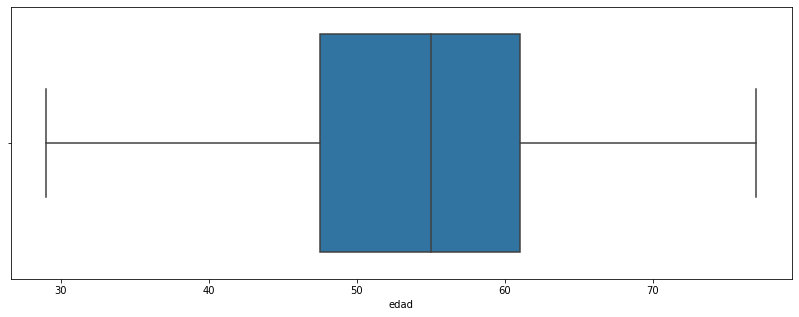

In [41]:
plt.figure(figsize = (14,5))
sns.boxplot(x = 'edad', data = df)
plt.show()

Para la edad, no encontramos outliers.

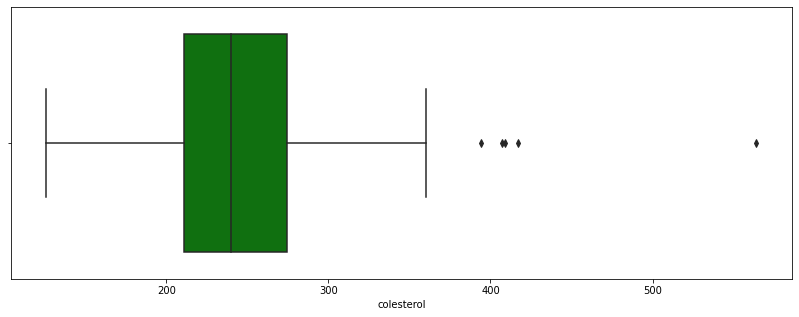

In [42]:
plt.figure(figsize = (14,5))
sns.boxplot(x = 'colesterol', data = df, color='g')
plt.show()

Para la variable "colesterol", sí se encuentran outliers. En concreto, por encima de Q3 + 1.5 * Rango_intercuartílico.

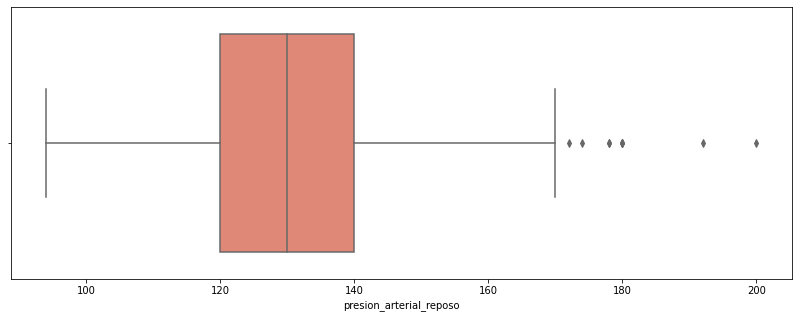

In [43]:
plt.figure(figsize = (14,5))
sns.boxplot(x = 'presion_arterial_reposo', data = df, color='#f17c67')
plt.show()

Para la variable "presion_arterial_reposo", sí se encuentran outliers. En concreto, por encima de Q3 + 1.5 * Rango_intercuartílico.

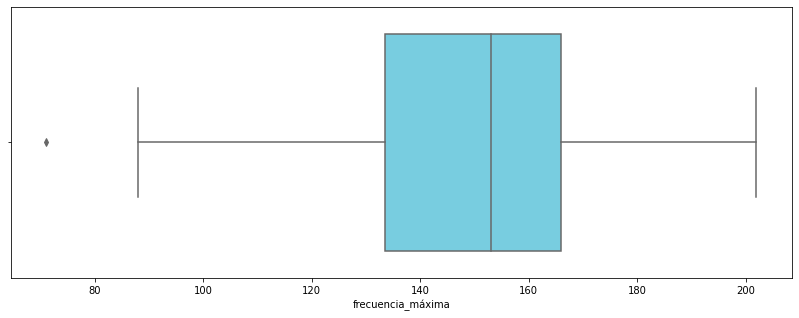

In [44]:
plt.figure(figsize = (14,5))
sns.boxplot(x = 'frecuencia_máxima', data = df, color='#67d8f1')
plt.show()

Para la variable "frecuencia_máxima", sí se encuentran outliers. En concreto, por debajo de Q1 - 1.5 * Rango_intercuartílico.

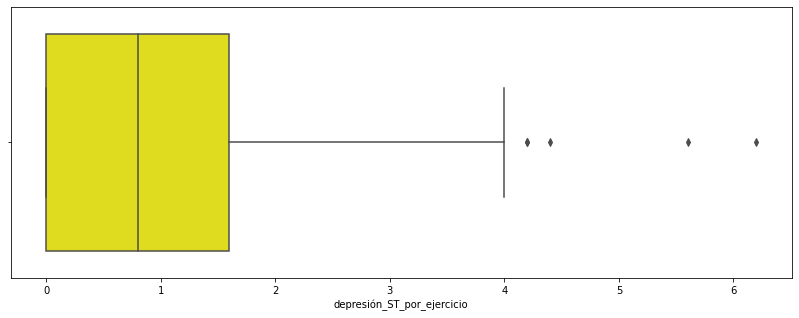

In [45]:
plt.figure(figsize = (14,5))
sns.boxplot(x = 'depresión_ST_por_ejercicio', data = df, color='#fffb00')
plt.show()

Para la variable "depresión_ST_por_ejercicio", sí se encuentran outliers. En concreto, por encima de Q3 + 1.5 * Rango_intercuartílico.

# Matriz de correlación

A continuación, vamos a representar la matriz que correlaciona cada una de las variables del dataframe:

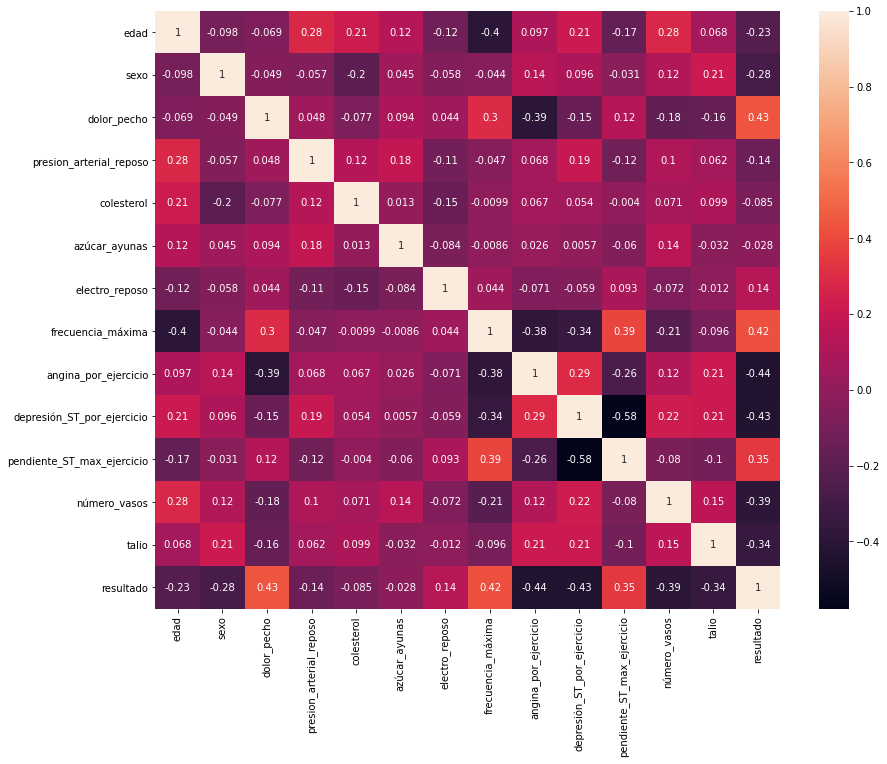

In [46]:
plt.figure(figsize = (14,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

Donde se observa una correlación más pronunciada es entre los resultados con el dolor de pecho, la angina inducida por ejercicio y la depresión de la onda ST producida por el ejercicio.

Sin embargo, en el enunciado se nos solicita realizar la matriz de correlación para las variables numéricas continuas. De este modo:

In [47]:
df_var_con = df[['edad','presion_arterial_reposo','colesterol','frecuencia_máxima','depresión_ST_por_ejercicio']]

In [48]:
df_var_con.head()

,edad,presion_arterial_reposo,colesterol,frecuencia_máxima,depresión_ST_por_ejercicio
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [49]:
df_var_con.dtypes

edad                            int64
presion_arterial_reposo         int64
colesterol                      int64
frecuencia_máxima               int64
depresión_ST_por_ejercicio    float64
dtype: object

In [50]:
corr = df_var_con.corr().round(3)
corr

,edad,presion_arterial_reposo,colesterol,frecuencia_máxima,depresión_ST_por_ejercicio
edad,1.000,0.279,0.214,-0.399,0.210
presion_arterial_reposo,0.279,1.000,0.123,-0.047,0.193
colesterol,0.214,0.123,1.000,-0.010,0.054
frecuencia_máxima,-0.399,-0.047,-0.010,1.000,-0.344
depresión_ST_por_ejercicio,0.210,0.193,0.054,-0.344,1.000


In [51]:
corr.style.background_gradient()

,edad,presion_arterial_reposo,colesterol,frecuencia_máxima,depresión_ST_por_ejercicio
edad,1.000000,0.279000,0.214000,-0.399000,0.210000
presion_arterial_reposo,0.279000,1.000000,0.123000,-0.047000,0.193000
colesterol,0.214000,0.123000,1.000000,-0.010000,0.054000
frecuencia_máxima,-0.399000,-0.047000,-0.010000,1.000000,-0.344000
depresión_ST_por_ejercicio,0.210000,0.193000,0.054000,-0.344000,1.000000


La matriz de correlación de las variables continuas muestra que no existe una correlación muy pronunciada entre ellas. Donde se aprecia una mayor correlación es entre la presión arterial y la edad (0.279), el colesterol con la edad (0.214) y la depresión en la onda ST inducida por el ejercicio con la edad (0.210).

En resumen, no se presentan valores lo suficientemente elevados como para considerar una correlación fuerte entre variables. El factor más determinante e influyente de entre todas las variables es la edad de los pacientes.

# Preprocesado de los datos

Sería buena práctica realizar algún procesado de los datos para facilitar la ingesta en el modelo de machine learning. En particular, parecería acertado escalar los datos para tratar los valores atípicos (outliers) que se presentan.

En relación a las variables categóricas, sería necesario realizar la transformación de las mismas a variables dummy. Del mismo modo, siempre que exista colinealidad directa entre dichas variables dummy, habría que eliminar las que resultaran recurrentes. Un ejemplo de esto sería el sexo, si un paciente es hombre, por definición no podrá ser mujer, entonces el género quedaría totalmente definido con una única columna en lugar de con dos al llevarse a cabo la transformación a valores dummy (0 ó 1).

Entediéndose la dimensión del Dataset como 2 (filas y columnas), no sería necesario ni posible reducir las dimensiones del mismo. Sin embargo, dado que parece que hay variables con mayor peso que otras, se podría estudiar el reducir aquellas categorías que fueran menos relevantes para el modelo (por ejemplo, aplicando feature importances).

In [52]:
df[df.duplicated()]

,edad,sexo,dolor_pecho,presion_arterial_reposo,colesterol,azúcar_ayunas,electro_reposo,frecuencia_máxima,angina_por_ejercicio,depresión_ST_por_ejercicio,pendiente_ST_max_ejercicio,número_vasos,talio,resultado
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Revisando los posibles duplicados, comprobamos que contamos con una fila con información repetida. Procedemos a eliminarla:

In [53]:
df.drop_duplicates(keep='first',inplace=True)

Y comprobamos primeramente que, en efecto, tenemos una fila menos que inicialmente (302 filas) y que no contamos con duplicados:

In [54]:
df.shape

(302, 14)

In [55]:
df[df.duplicated()]

,edad,sexo,dolor_pecho,presion_arterial_reposo,colesterol,azúcar_ayunas,electro_reposo,frecuencia_máxima,angina_por_ejercicio,depresión_ST_por_ejercicio,pendiente_ST_max_ejercicio,número_vasos,talio,resultado


Ahora debemos dividir los datos en x (variables predictorias) e y (la variable dependiente, a predecir).

In [56]:
x = df.drop('resultado', axis=1)
x.head()

,edad,sexo,dolor_pecho,presion_arterial_reposo,colesterol,azúcar_ayunas,electro_reposo,frecuencia_máxima,angina_por_ejercicio,depresión_ST_por_ejercicio,pendiente_ST_max_ejercicio,número_vasos,talio
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [57]:
y = df[['resultado']]
y.head()

,resultado
0,1
1,1
2,1
3,1
4,1


Realizamos una lista con las variables categóricas (nos va a simplificar la transformación a variables dummy):

In [58]:
var_cat = ['sexo','dolor_pecho','azúcar_ayunas','electro_reposo','angina_por_ejercicio','pendiente_ST_max_ejercicio','número_vasos','talio']

In [59]:
x_dummy = pd.get_dummies(x, columns = var_cat)
x_dummy.head()

,edad,presion_arterial_reposo,colesterol,frecuencia_máxima,depresión_ST_por_ejercicio,sexo_0,sexo_1,dolor_pecho_0,dolor_pecho_1,dolor_pecho_2,...,pendiente_ST_max_ejercicio_2,número_vasos_0,número_vasos_1,número_vasos_2,número_vasos_3,número_vasos_4,talio_0,talio_1,talio_2,talio_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


Pero como deseamos simplificar eliminando aquellas variables que presenten colinealidad directa, aplicamos el atributo drop_first = True, resultando:

In [60]:
x_dummy = pd.get_dummies(x, columns = var_cat, drop_first = True)
x_dummy.head()

,edad,presion_arterial_reposo,colesterol,frecuencia_máxima,depresión_ST_por_ejercicio,sexo_1,dolor_pecho_1,dolor_pecho_2,dolor_pecho_3,azúcar_ayunas_1,...,angina_por_ejercicio_1,pendiente_ST_max_ejercicio_1,pendiente_ST_max_ejercicio_2,número_vasos_1,número_vasos_2,número_vasos_3,número_vasos_4,talio_1,talio_2,talio_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


Obsérvese como pasamos de contar con 30 columnas a 22.

A continuación, deberemos dividir los datos x e y en datos de entrenamiento (train) y de testeo (test) respectivamente. Para ello, aplicamos el siguiente método contenido en scikit-learn:

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_dummy, y, test_size = 0.2)

Con estos pasos hemos preprocesado los datos, eliminando duplicados y transformando las variables categóricas a variables dummy interpretables por nuestros modelos predictivos. Adicionalmente, se han divido los datos en train y test.

# Entrenando los modelos predictivos

## Árboles de decisión

En este primer apartado, estudiaremos las predicciones obtenidas a través del modelo de árboles de decisión.

Instanciamos el modelo predictivo:

In [62]:
dtc = DecisionTreeClassifier()

Lo ajustamos con los datos de entrenamiento con que contamos:

In [63]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

Y realizamos las predicciones a través de los datos de testeo:

In [64]:
predicciones_dtc = dtc.predict(x_test)

In [65]:
predicciones_dtc

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

Ahora comprobaremos lo eficaz que resulta este modelo predictivo. Para ello haremos uso del reporte de clasificación:

In [66]:
print(classification_report(y_test, predicciones_dtc))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.80      0.75      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



Los valores de precisión obtenidos son algo bajos, contando con un 74% de acierto en los casos en que hay menos probabilidad de ataque al corazón (valor de la variable "resultado" = 0), y con un 80% de acierto para los supuestos en los que hay alta probabilidad de sufrir un infarto (valor de la variable "resultado" = 1).

Vamos a ver cómo quedaría la matriz de confusión:

In [67]:
print(confusion_matrix(y_test, predicciones_dtc))

[[23  6]
 [ 8 24]]


Se comprueba que se obtienen 23 verdaderos positivos y 24 verdaderos negativos.

## Máquinas de soporte de vectores

En este segundo apartado, estudiaremos las predicciones obtenidas a través del modelo de máquinas de soporte de vectores.

Instanciamos el modelo predictivo:

In [68]:
svm = SVC(kernel = 'linear')

Lo ajustamos con los datos de entrenamiento con que contamos:

In [69]:
svm.fit(x_train, y_train)

C:\Users\usuario\anaconda3\envs\aepi\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

Y realizamos las predicciones a través de los datos de testeo:

In [70]:
predicciones_svm = svm.predict(x_test)

In [71]:
predicciones_svm

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

Ahora comprobaremos lo eficaz que resulta este modelo predictivo. Para ello haremos uso del reporte de clasificación:

In [72]:
print(classification_report(y_test, predicciones_svm))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Los valores de precisión obtenidos son mejores a los obtenidos en el apartado anterior, contando con un 86% de acierto en los casos en que hay menos probabilidad de ataque al corazón (valor de la variable "resultado" = 0), y con un 85% de acierto para los supuestos en los que hay alta probabilidad de sufrir un infarto (valor de la variable "resultado" = 1).

Vamos a ver cómo quedaría la matriz de confusión:

In [73]:
print(confusion_matrix(y_test, predicciones_svm))

[[24  5]
 [ 4 28]]


Se comprueba que se obtienen 24 verdaderos positivos y 28 verdaderos negativos.

Hasta este punto, podemos concluir que resulta más efectivo el método de predicción a través de máquinas de soporte de vectores que el método de árboles de decisión.

# Optimización de parámetros

Veamos qué resultados podemos llegar a obtener si optimizamos la variables de entrada en los modelos predictivos.

Primero de todo, vamos a determinar qué variables tienen más peso para los modelos predictivos, con objeto de simplificar y reducir la cantidad de variables a introducir antes de llevar a cabo el entrenamiento de los datos. Para ello haremos uso del método "feature_importances":

## Árboles de decisión

In [74]:
accuracy_score(y_test, predicciones_dtc)

0.7704918032786885

In [75]:
dtc_feat_imp = pd.DataFrame(dtc.feature_importances_,
                index = x_train.columns,
                columns = ['importancia']).sort_values('importancia', ascending = False)

In [76]:
dtc_feat_imp

,importancia
talio_2,0.247504
edad,0.145513
depresión_ST_por_ejercicio,0.139792
frecuencia_máxima,0.131635
colesterol,0.107080
sexo_1,0.057774
presion_arterial_reposo,0.039673
dolor_pecho_2,0.033523
dolor_pecho_3,0.030899
número_vasos_1,0.019638


Nota: las variables se ordenan de mayor a menor importancia a través de la instancia
“.sort_values(‘importancia’, ascending=False)”.

Ahora es el momento de llevar a cabo las predicciones considerando de forma iterativa cada una
de estas características. Es decir, se realiza una primera predicción contando únicamente con la
variable "talio_2". Después, se obtiene la predicción considerando las dos primeras variables ("talio_2" y
"depresión_ST_por_ejercicio"), pasando posteriormente a ejecutarse la predicción añadiendo secuencialmente una a una
cada una de las variables restantes. Por último, se devolverá por pantalla la puntuación de las
precisiones obtenidas a través del método accuracy_score.

In [77]:
dtc_feat_imp.size

22

In [78]:
range_features = range(1,23)

Creamos una función que irá rellenando de forma iterativa una lista vacía donde se irán almacenando las puntuaciones de nuestro modelo en base a las categorías que vayan incluyéndose:

In [79]:
def puntuaciones_mayores(n):
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train[list(dtc_feat_imp.index[:n])], y_train)
    predicciones_dtc = dtc.predict(x_test[list(dtc_feat_imp.index[:n])])
    return accuracy_score(y_test, predicciones_dtc)

In [80]:
accuracy_scores = []

In [81]:
for n in range_features:
    precision_actual = puntuaciones_mayores(n)
    accuracy_scores.append(precision_actual)

In [82]:
accuracy_scores

[0.819672131147541,
 0.6885245901639344,
 0.6885245901639344,
 0.7704918032786885,
 0.7213114754098361,
 0.6885245901639344,
 0.7868852459016393,
 0.819672131147541,
 0.8360655737704918,
 0.7377049180327869,
 0.8032786885245902,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7868852459016393,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7868852459016393,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885]

Se observa que el mejor valor de precisión se consigue considerando las 9 primeras variables (0.836). Procedemos a suprimir de x_dummy las variables "despreciables":

In [84]:
x_dummy.drop(['número_vasos_1', 'número_vasos_2', 'talio_1', 'electro_reposo_1', 'número_vasos_3', 'número_vasos_4', 'electro_reposo_2', 'pendiente_ST_max_ejercicio_2', 'pendiente_ST_max_ejercicio_1', 'angina_por_ejercicio_1', 'azúcar_ayunas_1', 'dolor_pecho_1', 'talio_3'], axis = 1, inplace = True )
x_dummy

,edad,presion_arterial_reposo,colesterol,frecuencia_máxima,depresión_ST_por_ejercicio,sexo_1,dolor_pecho_2,dolor_pecho_3,talio_2
0,63,145,233,150,2.3,1,0,1,0
1,37,130,250,187,3.5,1,1,0,1
2,41,130,204,172,1.4,0,0,0,1
3,56,120,236,178,0.8,1,0,0,1
4,57,120,354,163,0.6,0,0,0,1
...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0
299,45,110,264,132,1.2,1,0,1,0
300,68,144,193,141,3.4,1,0,0,0
301,57,130,131,115,1.2,1,0,0,0


Quedando reducidas su columnas a 9.

Ahora volvemos a dividir en datos de entrenamiento y testeo:

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x_dummy, y, test_size = 0.2)

Seguidamente, se aplicará la función GridSearchCV(), de la librería SCIKIT-LEARN. Esta
función sirve para, una vez definido el conjunto de hiperparámetros que constituyen el
algoritmo, determinar los valores con los que se consigue una predicción más
exacta:

Definiremos los posibles hiperparámetros de la siguiente forma:

In [184]:
param_grid = {
    'max_depth': [x for x in range(1,100,10)],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'random_state': [x for x in range(1,100,10)],
    'min_samples_split': [x for x in range(2,20,2)],
    'min_samples_leaf': [1,2,3,4,5,6]
}

Se instancia la función GridSearchCV(), especificando que se ejecuta sobre el modelo dtc anteriormente declarado:

In [185]:
dtc_CV = GridSearchCV(estimator = dtc, param_grid = param_grid, n_jobs = -1)

Y se vuelve a ajustar:

In [186]:
dtc_CV.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'random_state': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                          91],
                         'splitter': ['best', 'random']})

Para determinar con qué hiperparámetros las predicciones son óptimas:

In [187]:
dtc_CV.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'random_state': 21,
 'splitter': 'random'}

Se instancia nuevamente el modelo de Árboles de Decisión, teniendo en cuenta estos hiperparámetros óptimos. Sería posible recurrir a la misma variable ya definida, pero por claridad se ha optado por renombrarla otra vez a través de:

In [188]:
dtc2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 11, random_state = 21, 
                              splitter = 'random', min_samples_split = 12, min_samples_leaf = 4)

Ajustamos el nuevo modelo y realizamos las predicciones:

In [189]:
dtc2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=4, min_samples_split=12,
                       random_state=21, splitter='random')

In [190]:
predicciones_dtc2 = dtc2.predict(x_test)

In [191]:
predicciones_dtc2

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

Y comprobamos el reporte de clasificación actualizado:

In [192]:
print(classification_report(y_test, predicciones_dtc2))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65        25
           1       0.74      0.89      0.81        36

    accuracy                           0.75        61
   macro avg       0.76      0.72      0.73        61
weighted avg       0.76      0.75      0.74        61



En este punto comprobamos que, a pesar de reducir el número de variables del dataframe y optimizar los hiperparámetros del modelo predictivo de árboles de decisión, no ha sido posible mejorar las métricas de precisión.

Se deberá operar de forma análoga con el modelo predictivo de máquinas de soporte de vectores a fin de determinar si en ese caso es posible optimizar los resultados obtenidos.